In [14]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from utils.coordinate_descent import coordinate_descent
from utils.shrinkage import shrink
from learn_dictionary import learn_dictionary
import numpy as np
from utils.create_patches import create_patches
from utils.prox_l1 import prox_l1
from sklearn.feature_extraction import image
from skimage.color import rgb2gray
from skimage.io import imread
from utils.fast_ista import fast_ista
from lista.lista import lista
import torch

# Dictionary Learning

## Visualising the Learned Dictionary

In [2]:
# Loading the learned dictionary
Wd = np.load('Wd.npy')

## Visualising the column vectors of the dictionary

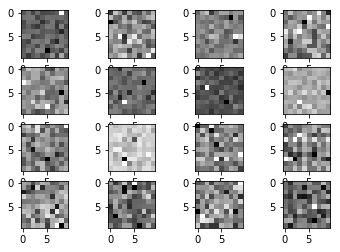

In [3]:
# This plots the first 16 basis vectors
for i in range(4):
    for j in range(4):
        plt.subplot(4,4, 4*i + j + 1)
        plt.imshow(Wd[:, 4*i + j].reshape(10,10), cmap ='gray')

## Learning Sparse Codes for a sample image from the dataset

Text(0.5, 1.0, 'Original Image')

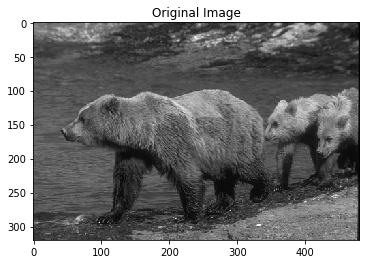

In [4]:
# Read the image
X = imread('data/train/100075.jpg')
X = rgb2gray(X)
X = X[0:320,0:480] # Convert the image size to a multiple of 10X10
plt.imshow(X, cmap='gray')
plt.title('Original Image')

In [5]:
# Dividing the image into patches
X_patched = np.zeros((100, 32*48))

for i in range(32):
    for j in range(48):
        X_patched[:, 48*i + j] = X[10*i: 10*(i+1), 10*j: 10*(j+1)].reshape((100))

In [6]:
# Learning the Sparse Code
alpha = 0.1
Z = fast_ista(X_patched, Wd, alpha)

Begin Iterative Procedure
Algorithm Complete


In [7]:
# Reconstructing the image from the sparse code
X_reconstructed = np.zeros(X.shape)
X_temp = np.matmul(Wd, Z)

for i in range(32):
    for j in range(48):
        X_reconstructed[10*i : 10*(i+1), 10*j : 10*(j+1)] = X_temp[:, 48*i + j].reshape((10,10))

Text(0.5, 1.0, 'Reconstruced Image')

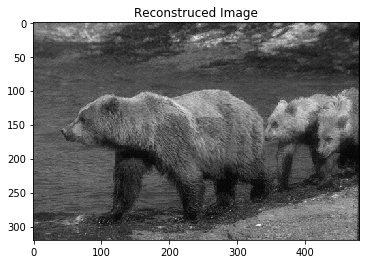

In [8]:
# Plotting the reconstructed image
plt.imshow(X_reconstructed, cmap='gray')
plt.title('Reconstruced Image')

In [10]:
# Finding the reconstuction error
print('The reconstruction error is:', np.linalg.norm(X - X_reconstructed))

The reconstruction error is: 12.138464473145508


# LISTA

In [16]:
# Loading the pre-trained network model
net = lista()
net = torch.load('/Users/abhyudaypuri/learnable-ISTA/Network_1.pth', map_location='cpu')

## Prediction Sparse Codes using LISTA

Text(0.5, 1.0, 'Original Image')

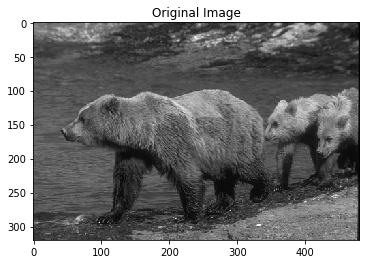

In [18]:
# Reading the image
X = imread('data/train/100075.jpg')
X = rgb2gray(X)
X = X[0:320,0:480]
plt.imshow(X, cmap='gray')
plt.title('Original Image')

In [19]:
# Creating the patches
X_patched = np.zeros((100, 32*48))
for i in range(32):
    for j in range(48):
        X_patched[:, 48*i + j] = X[10*i: 10*(i+1), 10*j: 10*(j+1)].reshape((100))

In [21]:
# Predicting the sparse codes
Z_patched = net(torch.from_numpy(X_patched))
Z = Z_patched.data.numpy()

In [22]:
# Load the dictionary
Wd = np.load('Wd.npy')

In [23]:
# Reconstructing the image
X_reconstructed = np.zeros(X.shape)
X_temp = np.matmul(Wd, Z)

for i in range(32):
    for j in range(48):
        X_reconstructed[10*i : 10*(i+1), 10*j : 10*(j+1)] = X_temp[:, 48*i + j].reshape((10,10))

Text(0.5, 1.0, 'Reconstruced Image')

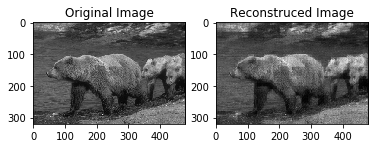

In [24]:
# Plotting the reconstructed image
plt.subplot(1,2,1)
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(X_reconstructed, cmap='gray')
plt.title('Reconstruced Image')

In [25]:
# Finding the reconstuction error
print('The reconstruction error is:', np.linalg.norm(X - X_reconstructed))

The reconstruction error is: 31.154838910158034


# Image Donoising

Text(0.5, 1.0, 'Noisy Image')

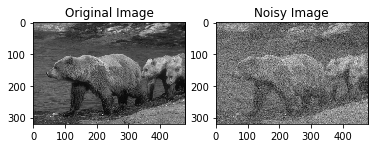

In [26]:
# Creating the noisy image 
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise

plt.subplot(1,2,1)
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(X_noisy, cmap='gray')
plt.title('Noisy Image')

In [27]:
# Creating patches of the noisy image
X_patched = np.zeros((100, 32*48))

for i in range(32):
    for j in range(48):
        X_patched[:, 48*i + j] = X_noisy[10*i: 10*(i+1), 10*j: 10*(j+1)].reshape((100))

In [28]:
# Prediction Sparse Codes for the noisy image
Z_patched = net(torch.from_numpy(X_patched))
Z = Z_patched.data.numpy()

In [29]:
# Reconstructing the image from the Sparse Code
X_reconstructed = np.zeros(X.shape)
X_temp = np.matmul(Wd, Z)

for i in range(32):
    for j in range(48):
        X_reconstructed[10*i : 10*(i+1), 10*j : 10*(j+1)] = X_temp[:, 48*i + j].reshape((10,10))

Text(0.5, 1.0, 'Denoised Image')

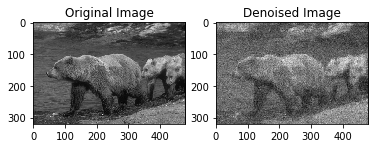

In [30]:
plt.subplot(1,2,1)
plt.imshow(X, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(X_reconstructed, cmap='gray')
plt.title('Denoised Image')

In [32]:
noise_1 = (np.sum((X - np.mean(X))**2) / X.size)**(0.5)
noise_2 = (np.sum((X_noisy - np.mean(X_noisy))**2) / X.size)**(0.5)
noise_3 = (np.sum((X_reconstructed - np.mean(X_reconstructed))**2) / X.size)**(0.5)

print('RMS Noise level for the Original Image:', noise_1)
print('RMS Noise level for the Noisy Image:', noise_2)
print('RMS Noise level for the Denoised Image:', noise_3)

RMS Noise level for the Original Image: 0.13659464711778332
RMS Noise level for the Noisy Image: 0.16922099116686312
RMS Noise level for the Denoised Image: 0.16530728466455083
